In [1]:
import numpy as np


In [2]:
# 均方误差 mean squared error
def mean_squre_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [3]:
# 设置“2”为正确解
t = np.array([0,0,1,0,0,0,0,0,0,0])
# 例1: 神经网络输出2的概率为0.6
y1 = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
# 例2: 神经网络输出7的概率为0.6
y2 = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
mean_squre_error(y1, t), mean_squre_error(y2, t)  # y1与t的误差较小，y2与t的误差较大

(0.09750000000000003, 0.5975)

In [4]:
# 交叉熵误差 cross entropy error
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
# 例1和例2
cross_entropy_error(y1, t), cross_entropy_error(y2, t)

(0.510825457099338, 2.302584092994546)

In [5]:
# mini-batch 小批量样本学习
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_lable=True)
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

In [6]:
batch_size = 10
train_size = x_train.shape[0]
batch_mask = np.random.choice(train_size, batch_size)  # np.random.choice(60000, 10) 在0～59999之间随机选择10个数字

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

x_batch.size, x_batch.shape  # .size返回元素数，.shape返回张量的行数和列数

(7840, (10, 784))

In [7]:
# mini-batch下的交叉熵误差实现
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)    # 将一维数组变成二维数组，但是行数仅有1行，
        y = y.reshape(1, y.size)    # 这里是为了单个数据下batch.shape[0]返回变量数，而不是数据数
        
        batch_size = y.shape[0]     # 当单个数据时，batch_size = 1
        return -np.sum(t * np.log(y + 1e-7)) / batch_size
        

In [8]:
# 数值微分 - 舍入误差
def numerical_diff(f, x):
    h = np.float32(10e-50)  # 为了精细度，反而引入了舍入误差（截断所带来的误差）
    return (f(x+h) - f(x)) / h

np.float32(10e-50)

0.0

In [9]:
# 数值微分 - 中心差分
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01 * x**2 + 0.1 * x

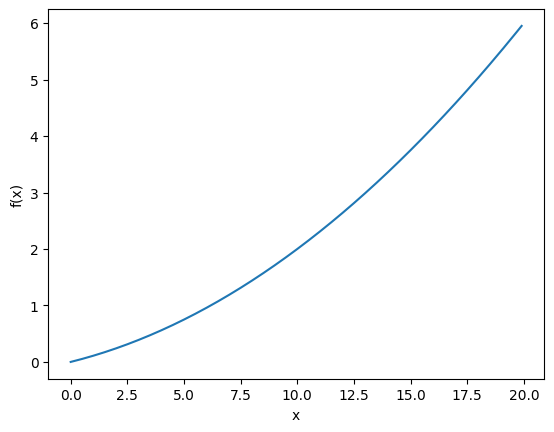

In [10]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [11]:
# 计算x=5和10上的导数
numerical_diff(function_1, 5), numerical_diff(function_1,10)

(0.1999999999990898, 0.2999999999986347)

In [12]:
# 偏导数
def function_2(x):
    return x[0]**2 + x[1]**2

# 梯度
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h  # 单变量+h，另一变量不变
        fxh1 = f(x)

        x[idx] = tmp_val - h  # 单变量-h，另一变量不变
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val      # 还原单变量，进行下一变量的微分
    
    return grad

[
    numerical_gradient(function_2, np.array([3.0, 4.0])),
    numerical_gradient(function_2, np.array([0.0, 2.0])),
    numerical_gradient(function_2, np.array([3.0, 0.0]))
]

[array([6., 8.]), array([0., 4.]), array([6., 0.])]

In [13]:
# 梯度图
x0 = np.arange(-2.0, 2.0, 0.1)
x1 = np.arange(-2.0, 2.0, 0.1)
X0, X1 = np.meshgrid(x0, x1)  # x0以行为轴，沿列展开；x1以列为轴，沿行展开
X0, X1

(array([[-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        ...,
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
        [-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9]]),
 array([[-2. , -2. , -2. , ..., -2. , -2. , -2. ],
        [-1.9, -1.9, -1.9, ..., -1.9, -1.9, -1.9],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ 1.7,  1.7,  1.7, ...,  1.7,  1.7,  1.7],
        [ 1.8,  1.8,  1.8, ...,  1.8,  1.8,  1.8],
        [ 1.9,  1.9,  1.9, ...,  1.9,  1.9,  1.9]]))

In [14]:
X0 = X0.flatten()
X1 = X1.flatten()
np.array([X0, X1])

array([[-2. , -1.9, -1.8, ...,  1.7,  1.8,  1.9],
       [-2. , -2. , -2. , ...,  1.9,  1.9,  1.9]])

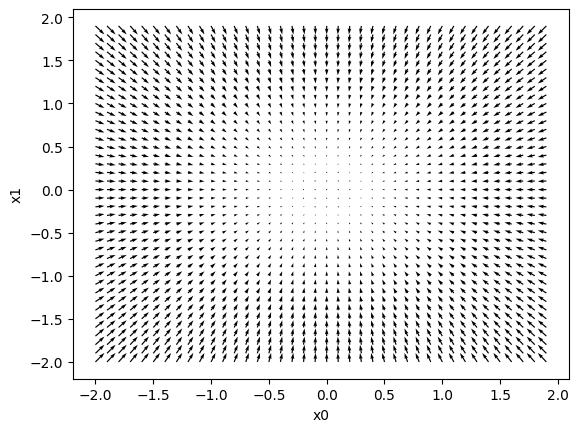

In [15]:
A = np.array([X0, X1]).T  # 转置保证数据按行分布
grad = np.zeros_like(A)
for idx, x in enumerate(A):
    grad[idx] = numerical_gradient(function_2, x)
grad = grad.T  # 再次转置，保证导数按列分布，方面画图
plt.quiver(X0, X1, -grad[0], -grad[1])  # X0, X1, grad都是一维数组，本质上就是在一个点一个点的画图
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [16]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x = x - lr*grad

    return x

init_x = np.array([-3.0, 4.0])
[
    gradient_descent(function_2, init_x, lr=0.1),
    gradient_descent(function_2, init_x, lr=1e-3),  # 学习率lr过小，迭代缓慢
    gradient_descent(function_2, init_x, lr=10)     # 学习率lr过大，迭代震荡
]


[array([-6.11110793e-10,  8.14814391e-10]),
 array([-2.45570041,  3.27426722]),
 array([-2.58983747e+13, -1.29524862e+12])]

In [17]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient
class simpleNet:
    def __init__(self):
        self.W = np.array([
            [0.47355232, 0.9977393, 0.84668094], 
            [0.85557411, 0.03563661, 0.69422093]
        ])
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

net = simpleNet()
x = np.array([0.6, 0.9])
p = net.predict(x)
t = np.array([0, 0, 1])
p, np.argmax(p), net.loss(x, t)

(array([1.05414809, 0.63071653, 1.1328074 ]), 2, 0.9280682857864075)

仔细观察这一次的求导可以发现，所使用数据t=[0, 0, 1]与softmax(predic(x))的交叉熵，在numerical_gradient里是对W的各个变量进行偏导
在numerical_gradient的偏导中，关键的要素时`multi_index`是一个1x2的坐标数组

In [18]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.21924757,  0.14356243, -0.36281   ],
       [ 0.32887136,  0.21534364, -0.544215  ]])

In [19]:
import sys, os
sys.path.append(os.pardir)
from common.functions import sigmoid, softmax, cross_entropy_error
from common.gradient import numerical_gradient
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, \
                 weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
    
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1)
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2)
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / y.size

        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])  # 理解的诀窍是所传入神经元权重是一个对象，
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])  # 当求某一个权重的导数（对loss）时，其他权重保持不变
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

        return grads

net = TwoLayerNet(784, 10, 10)

x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)  # 由于每次计算某一个权重的导数都需要重新计算两遍loss_W，所以很慢

grads["W1"].shape, grads["b1"].shape, grads["W2"].shape, grads["b2"].shape

((784, 10), (10,), (10, 10), (10,))

In [20]:
# mini-batch实现
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_lable=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 1200
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
epoch_num = 0
iter_per_epoch = max(train_size/batch_size, 1)  # 一个epoch表示遍历一次数据大小的迭代数，这里60000/100

network = TwoLayerNet(input_size=784, hidden_size=10, output_size=10)

for i in range(iters_num):
    # mini-batch
    batch_mask = np.random.choice(train_size, batch_size)  # 从0~train_size-1选出batch_size个数
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 计算梯度
    grad = network.numerical_gradient(x_batch, t_batch)
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]  # 梯度更新
    
    # 记录
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # 经过一个epoch后评估模型的泛化能力
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)  # 对于训练集的准确度计算
        test_acc = network.accuracy(x_test, t_test)     # 对于测试集的准确度计算（重要！）
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"epoch {epoch_num}: train acc - {train_acc}, test acc - {test_acc}")
        epoch_num += 1

# 时间过长，忽略；后面学习高速版本的gradient计算

epoch 0: train acc - 0.09905, test acc - 0.0983


KeyboardInterrupt: 